# Object Oriented Programming

We learn what Object Oriented Programming (OOP) is, what Classes are and how to write our own, and we learn how to make graphs using OOP and and the `matplotlib` package.

In [1]:
class Point():
    """Holds on a point (x,y) in the plane"""
    def __init__(self, x=0, y=0):
        assert isinstance(x, (int, float)) and isinstance(y, (int, float))
        self.x = float(x)
        self.y = float(y)
    def __repr__(self):
        return "Point(" + str(self.x) + ", " + str(self.y) + ")"
    def __eq__(self, other):
        return (self.x, self.y) == (other.x, other.y)
    def __lt__(self, other):
        return (self.x < other.x and self.y < other.y)
    def __add__(self, other):
        assert isinstance(other, (int, Point))
        if isinstance(other, Point):
            return Point(self.x + other.x , self.y + other.y)
        else: # other is int, taken as (int, int)
            return Point(self.x + other , self.y + other)
    def increment(self, other): 
        '''this method changes self (add "inplace")'''
        assert isinstance(other,Point)
        self.x += other.x
        self.y += other.y
    
    def is_extreme(self, *points):
        for point in points:
            if not self > point:
                return False
        return True



In [2]:
p = Point(5, 6)
p.is_extreme(Point(1,1))

True

In [3]:
Point.is_extreme(Point(7,8), Point(1,1), Point(4,5), Point(2,3))

True

In [4]:
class Rectangle1():
    """
    Holds a parallel-axes rectangle by storing two points
    lower left vertex - llv
    upper right vertex - urv
    """
    def __init__(self, lower_left_vertex, upper_right_vertex):
        assert isinstance(lower_left_vertex, Point)
        assert isinstance(upper_right_vertex, Point)
        assert lower_left_vertex < upper_right_vertex 
        self.llv = lower_left_vertex
        self.urv = upper_right_vertex
        
    def __repr__(self):
        representation = "Rectangle with lower left {0} and upper right {1}"
        return representation.format(self.llv, self.urv)

    def dimensions(self):
        height = self.urv.y - self.llv.y
        width = self.urv.x - self.llv.x
        return height, width
    
    def area(self):
        height, width = self.dimensions()
        area = height * width
        return area
    
    def transpose(self):
        """
        Reflection with regard to the line passing through lower left vertex with angle 315 (-45) degrees
        """
        height, width = self.dimensions()
        self.urv = self.llv
        self.llv = Point(self.urv.x - height, self.urv.y - width)

In [5]:
rec = Rectangle1(Point(), Point(2,1))
print(rec)
print("Area:", rec.area())
print("Dimensions:", rec.dimensions())
rec.transpose()
print("Transposed:", rec)

Rectangle with lower left Point(0.0, 0.0) and upper right Point(2.0, 1.0)
Area: 2.0
Dimensions: (1.0, 2.0)
Transposed: Rectangle with lower left Point(-1.0, -2.0) and upper right Point(0.0, 0.0)


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### A Triangle Class


In [18]:
class Triangle:
    def __init__(self, x0y0, x1y1, x2y2,color):
        self.x0y0 = x0y0
        self.x1y1 = x1y1
        self.x2y2 = x2y2
        self.x = np.array([self.x0y0[0], self.x1y1[0], self.x2y2[0]])
        self.y = np.array([self.x0y0[1], self.x1y1[1], self.x2y2[1]])
        self.color = color
    def __repr__(self):
        return f'Triangle with corners: {self.x0y0}, {self.x1y1}, {self.x2y2}'
    def area(self):
        A = 0.5 * np.abs((self.x[0] - self.x[2]) * (self.y[1] - self.y[0]) - 
                         (self.x[0] - self.x[1]) * (self.y[2] - self.y[0]))
        return A
    def plot(self):
        plt.fill(self.x, self.y, color=self.color)

In [19]:
t1 = Triangle( (0,1), (3,0), (2,3),'r')
print(t1.area())

4.0


(-2.5, 8.5, -1.35, 6.35)

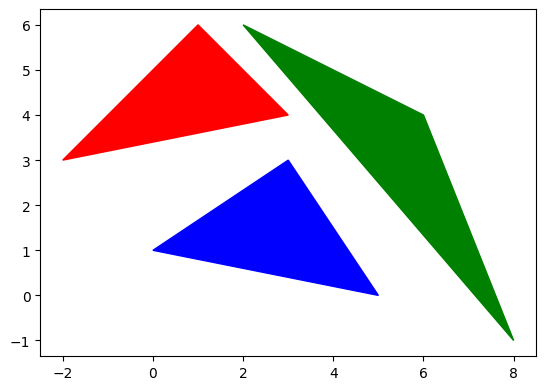

In [20]:
tlist = []  # start with an empty list
t1 = Triangle((0, 1), (5, 0), (3, 3), 'b')
tlist.append(t1)  # add t1 to the list
t2 = Triangle((3, 4), (1, 6), (-2, 3), 'r')
tlist.append(t2)
t3 = Triangle((8, -1), (6, 4), (2, 6), 'g')
tlist.append(t3)
plt.figure()
for t in tlist:
    t.plot()
plt.axis('scaled')